In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt 
from pathlib import Path
%matplotlib inline

In [2]:
# Whale Daily Returns
# read csv file
whale_returns_path = Path("../Resources/whale_returns.csv")

whale_returns = pd.read_csv(whale_returns_path, infer_datetime_format=True, parse_dates=True, index_col="Date")
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls values
whale_returns.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON &amp; CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON &amp; CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
# Algorithmic Daily Returns
# read csv file
algo_returns_path = Path("../Resources/algo_returns.csv")

algo_returns = pd.read_csv(algo_returns_path, infer_datetime_format=True, parse_dates=True, index_col="Date")
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls values
algo_returns.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [7]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [8]:
# S&P500 Returns
sp500_historical_path = Path("../Resources/sp500_historical.csv")

sp500_historical = pd.read_csv(sp500_historical_path, infer_datetime_format=True, parse_dates=True, index_col="Date")
sp500_historical.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
sp500_historical.columns

Index([&#39;Close&#39;], dtype=&#39;object&#39;)

In [10]:
# Remove dollar signs
sp500_historical['Close'] = sp500_historical['Close'].str.replace('$', '')
sp500_historical['Close']

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [12]:
# confirm data type
sp500_historical.dtypes

Close    object
dtype: object

In [15]:
# set price as float
sp500_historical = sp500_historical.astype('float')
sp500_historical.dtypes

Close    float64
dtype: object

In [16]:
# Calculate the S&P 500  daily returns.
sp500_returns = sp500_historical.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [17]:
# Count nulls values
sp500_returns.isnull().mean() * 100

Close    0.060643
dtype: float64

In [18]:
# Drop nulss
sp500_returns = sp500_returns.dropna()
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [20]:
# Rename column
sp500_returns= sp500_returns.rename(columns={"Close": "S&P 500"})
sp500_returns.head()

,S&P 500
S&P 500,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [25]:
# Combined daile returns 
Combined_daily_returns = pd.concat([algo_returns, sp500_returns, whale_returns], axis='columns', join='inner')

Combined_daily_returns.head()


,Algo 1,Algo 2,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
2015-03-03,-0.001942,-0.000949,0.004408,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.008589,0.002416,-0.001195,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.000955,0.004323,0.014378,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.004957,-0.011460,-0.003929,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.005447,0.001303,0.017254,0.000582,0.004225,0.005843,-0.001652


In [ ]:

# Sorting
Combined_daily_returns = Combined_daily_returns.sort_index(inplace=True

&lt;AxesSubplot:&gt;

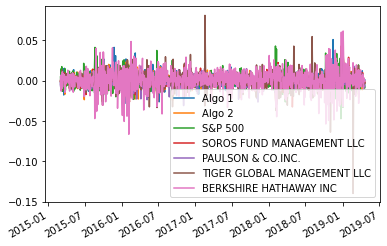

In [26]:
# Portfolio Analysis
# Plot daily returns
Combined_daily_returns.plot()

In [ ]:
# Plot cumulative returns
cumulative_returns = (1 + Combined_daily_returns).cumprod()

In [ ]:
# Risk
# Box plot to visually show risk
Combined_daily_returns.plot(kind='box')

In [ ]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
whale_std = whale_returns.std()
algo_std = algo_returns.std()
sp500_std = sp500_returns.std()

# Which portfolios are riskier than the S&P 500?

In [ ]:
# Determine which portfolios are riskier than the S&P 500
if whale_std > sp500_std:
    print("True")
elif algo_std > sp500_std:
    print("True")
else:
    print("False")

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = (Combined_daily_returns.mean()*252)/(Combined_daily_returns.std *np.sqrt(252))

In [ ]:
# Rolling Statistics
# Calculate and plot the rolling standard deviation using a 21 trading day window
whale_SMA_21 = whale_std.rolling(window=21).mean()
algo_SMA_21 = algo_std.rolling(window=21).mean()
sp500_SMA_21 = sp500_std.rolling(window=21).mean()

In [ ]:
# Construct a correlation table
correlation = Combined_daily_returns.corr()

In [ ]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)